In [1]:
from analysis import Analysis
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
PATH100_BATCH2 = "F:\Thesis\Experiments\Costs\Results\/25-06-2022 Batch-2 100.csv"
PATH100_BATCH3 = "F:\Thesis\Experiments\Costs\Results\/27-06-2022 Batch-3 100.csv"
PATH100_BATCH4 = "F:\Thesis\Experiments\Costs\Results\/28-06-2022 Batch-4 100.csv"
PATHME_BATCH2 = "F:\Thesis\Experiments\Costs\Results\/24-06-2022 Batch-2 ME.csv"
PATHME_BATCH3 = "F:\Thesis\Experiments\Costs\Results\/27-06-2022 Batch-3 ME.csv"
PATHME_BATCH4 = "F:\Thesis\Experiments\Costs\Results\/28-06-2022 Batch-4 ME.csv"
data100_batch2 = pd.read_csv(PATH100_BATCH2)
data100_batch3 = pd.read_csv(PATH100_BATCH3)
data100_batch4 = pd.read_csv(PATH100_BATCH4)
datame_batch2 = pd.read_csv(PATHME_BATCH2)
datame_batch3 = pd.read_csv(PATHME_BATCH3)
datame_batch4 = pd.read_csv(PATHME_BATCH4)
data100 = pd.concat([data100_batch2, data100_batch3, data100_batch4], ignore_index=True)
datame = pd.concat([datame_batch2, datame_batch3, datame_batch4], ignore_index=True)

data100 = Analysis.append_durations(data100)
datame = Analysis.append_durations(datame)
print("fast subjects ME: ", datame['duration'].isnull().values.any())
print("fast subjects 100: ", data100['duration'].isnull().values.any())

s100_data = Analysis.convert_100_data(data100)
mes_data = Analysis.convert_me_data(datame)

print("subjects that failed the attention checks in the ME survey: ", mes_data['attention_checks_passed'].loc[mes_data['attention_checks_passed'] == False].values.any())
print("subjects that failed the attention checks in the 100-level survey: ", s100_data['attention_checks_passed'].loc[s100_data['attention_checks_passed'] == False].values.any())


fast subjects ME:  False
fast subjects 100:  False
subjects that failed the attention checks in the ME survey:  False
subjects that failed the attention checks in the 100-level survey:  False


In [2]:
print(s100_data)
print(mes_data)

      TP1    TP2    TP3    TP4    TP5    TP6    TP7    TP8    TN1    TN2  ...  \
0    80.0   89.0   87.0    0.0   77.0   90.0   60.0   85.0   75.0   60.0  ...   
1   100.0  100.0  100.0  -15.0  100.0  100.0   25.0   90.0  -20.0  100.0  ...   
2    90.0  100.0  100.0   70.0  100.0   96.0   90.0  100.0   90.0   90.0  ...   
3   100.0  100.0   95.0 -100.0  100.0   98.0   98.0   90.0   99.0   96.0  ...   
4   -90.0  100.0  100.0  100.0  100.0    0.0  -30.0  100.0  100.0  -90.0  ...   
..    ...    ...    ...    ...    ...    ...    ...    ...    ...    ...  ...   
63 -100.0 -100.0  -99.0  -91.0 -100.0 -100.0  -14.0  -81.0    3.0   96.0  ...   
64  100.0   99.0  100.0   98.0   98.0   99.0  100.0  100.0  100.0   99.0  ...   
65  100.0  100.0   98.0   95.0  100.0  100.0  100.0  100.0   50.0  100.0  ...   
66   94.0   20.0   98.0   99.0   99.0   99.0   99.0   84.0  -20.0  100.0  ...   
67   80.0  100.0  100.0  100.0  100.0   99.0  100.0   98.0   90.0  100.0  ...   

    Hateful_FN8  Hateful_RE

In [3]:
print("ME scale")
Analysis.print_means(mes_data)
print("100-level scale")
Analysis.print_means(s100_data)


ME scale
TP 25.918418
TN 39.803605
FP -25.771068
FN -33.822411
REJ -16.081677
100-level scale
TP 51.724265
TN 62.720588
FP -39.051471
FN -47.637868
REJ -21.415441


In [4]:
Analysis.print_reliabilities(mes_data, scale="ME")

Reliability scale:  0.7799353310345875
TP 0.06642454307046264
TN 0.09947271297584492
FP 0.39314678266051883
FN 0.9194940763976943
REJ -0.31122839546794645


In [5]:
Analysis.print_reliabilities(s100_data, scale="S100")


Reliability scale:  0.4395143291058283
TP 0.04369406920309393
TN 0.10804626893353575
FP 0.07016599993170014
FN 0.13760526467192835
REJ 0.07305482583194356


In [6]:
Analysis.print_statistics(data_mes=mes_data, data_s100=s100_data)

Cohen's d -0.07784625518881982
Shapiro Wilk normality test MES:  ShapiroResult(statistic=0.9391598105430603, pvalue=0.0323997363448143)
Shapiro Wilk normality test S100:  ShapiroResult(statistic=0.9293099641799927, pvalue=0.015293026342988014)
Bartlett's test for equal variances:   BartlettResult(statistic=7.934695176545954, pvalue=0.004849579602858798)
Mann-Whitney U test:  MannwhitneyuResult(statistic=787.0, pvalue=0.9042603121784771)
Unpaired T-test:  Ttest_indResult(statistic=-0.34375975508339496, pvalue=0.7319519075409943)
Pearson:  (0.984181945940737, 3.57866701777773e-30)
Spearman:  SpearmanrResult(correlation=0.9688555347091935, pvalue=1.2204660208328934e-24)
Kendall:  KendalltauResult(correlation=0.8717948717948719, pvalue=2.324012946824342e-15)


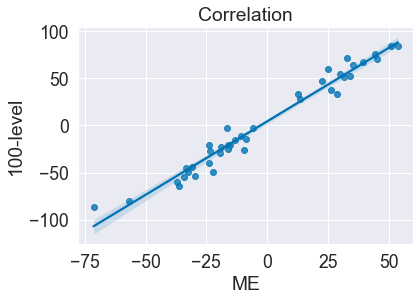

In [7]:
%matplotlib inline
sns.set_theme(style="whitegrid")
sns.set(font_scale = 1.6, palette="colorblind")
Analysis.plot_validity(data_mes=mes_data, data_s100=s100_data)

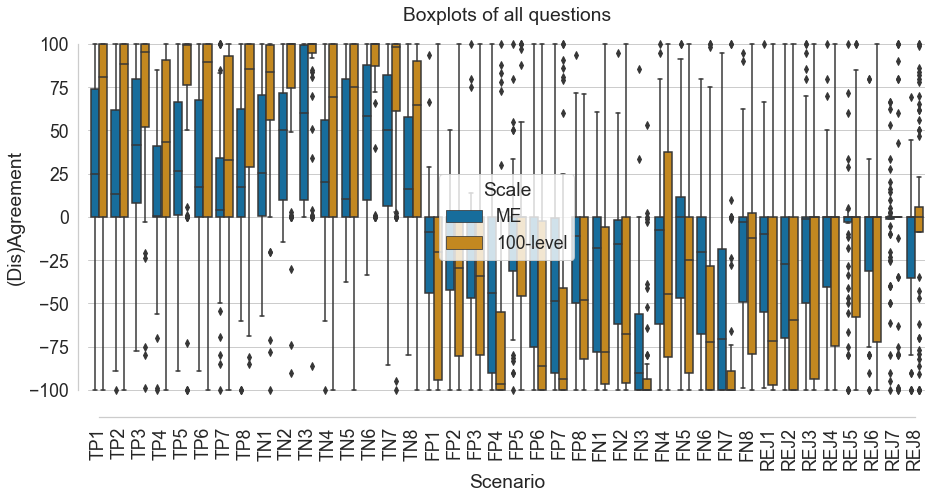

In [8]:
%matplotlib inline
sns.set(rc={'figure.figsize':(15,7)})
sns.set(font_scale = 1.6, palette="colorblind")
sns.set_style("whitegrid")
Analysis.plot_dual_boxplots(data_mes=mes_data, data_s100=s100_data)

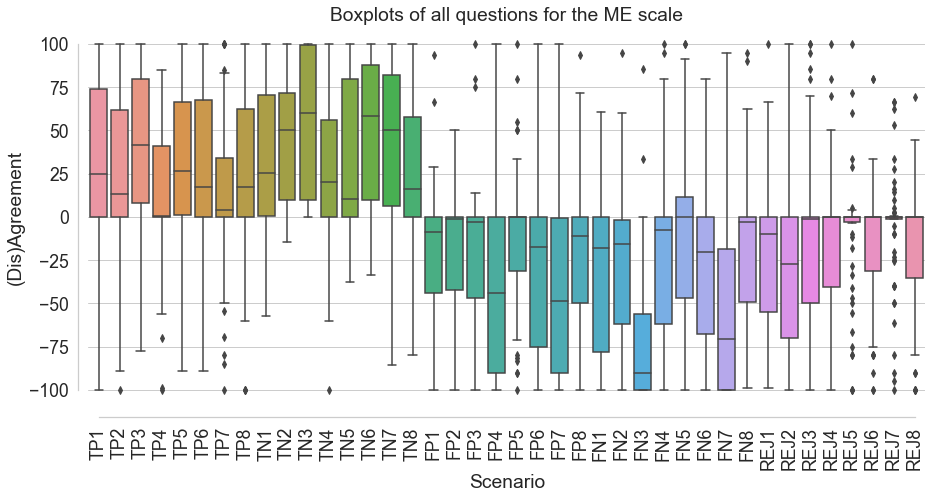

In [9]:
%matplotlib inline
sns.set(rc={'figure.figsize':(15,7)})
sns.set(font_scale = 1.6, palette="colorblind")
sns.set_style("whitegrid")
Analysis.plot_boxplots(data=mes_data, scale_title="ME")

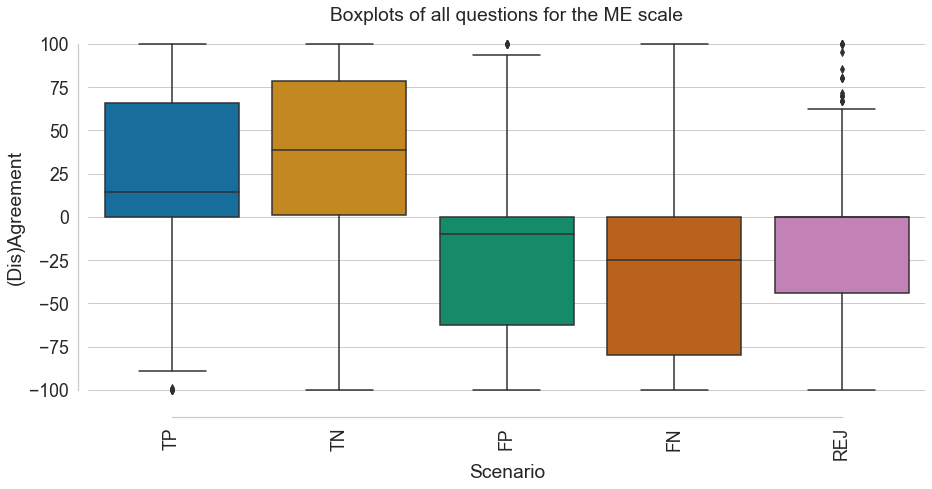

In [10]:
%matplotlib inline
sns.set(rc={'figure.figsize':(15,7)})
sns.set(font_scale = 1.6, palette="colorblind")
sns.set_style("whitegrid")
Analysis.plot_boxplots(data=mes_data, scale_title="ME", show_individual=False)

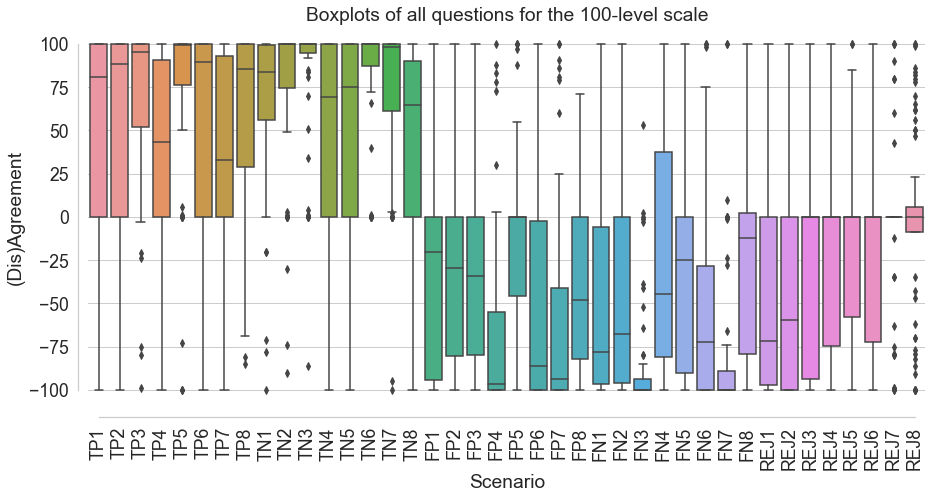

In [11]:
%matplotlib inline
sns.set(rc={'figure.figsize':(15,7)})
sns.set(font_scale = 1.6, palette="colorblind")
sns.set_style("whitegrid")
Analysis.plot_boxplots(data=s100_data, scale_title="100-level")

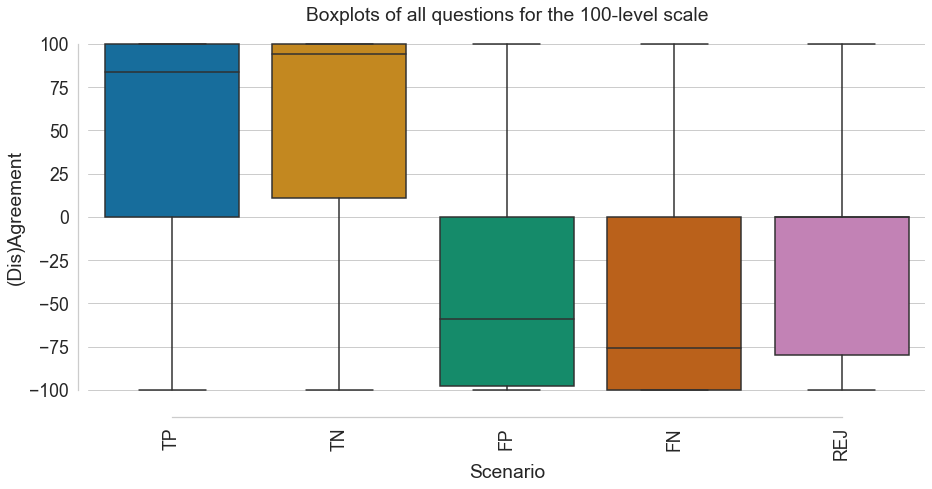

In [12]:
%matplotlib inline
sns.set(rc={'figure.figsize':(15,7)})
sns.set(font_scale = 1.6, palette="colorblind")
sns.set_style("whitegrid")
Analysis.plot_boxplots(data=s100_data, scale_title="100-level", show_individual=False)

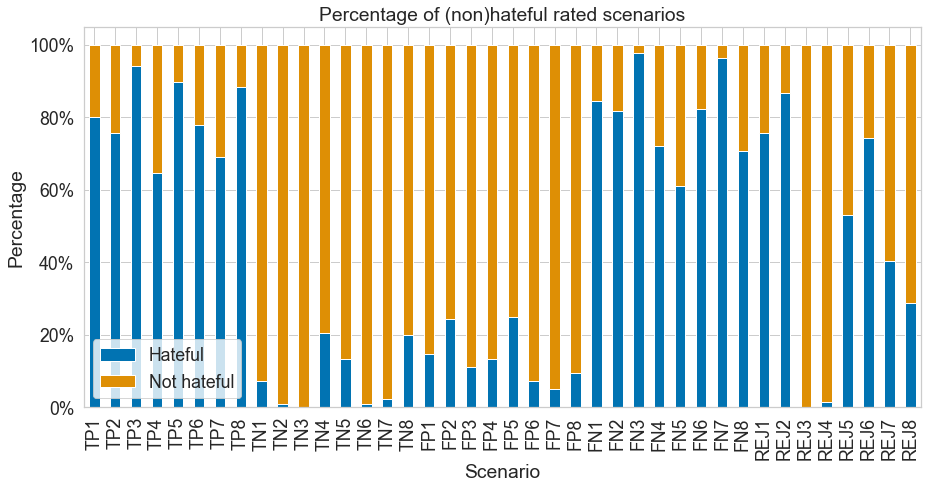

In [13]:
%matplotlib inline
sns.set(rc={'figure.figsize':(15,7)})
sns.set(font_scale = 1.6, palette="colorblind")
sns.set_style("whitegrid")
Analysis.plot_hatefulness(data_mes=mes_data, data_s100=s100_data)